ALL MODELS

In [1]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('F:\Video_Interview_Bots\Video_Interview_Bot\Emotion_Detection_FER\Classification\Input_Data\Video_features_combined_most_frequent_with_not_stressed_column - Sheet1.csv')

# Display the first few rows and info
print(data.head())
print(data.info())

    ID  min_smile_score  max_smile_score  most_frequent_smile_score  \
0   P1     7.830000e-09         0.876471                   0.069918   
1  P10     4.800000e-05         0.974816                   0.021644   
2  P11     3.910000e-07         0.912956                   0.014947   
3  P12     1.050000e-05         0.999570                   0.117913   
4  P13     4.860000e-06         0.996155                   0.217647   

   max_emotion_score  min_emotion_score  most_frequent_emotion_score  \
0           0.904022                0.0                     0.374254   
1           0.663863                0.0                     0.609334   
2           0.974807                0.0                     0.974807   
3           0.938945                0.0                     0.767756   
4           0.951761                0.0                     0.597788   

   min_gesture_score  max_gesture_score  most_frequent_gesture_score  \
0           0.500647           0.638285                     0.500647

In [2]:
# Set threshold for binary classification
data['Stressed_Label'] = (data['Not Stressed'] >= 5.4).astype(int)

# Drop the 'Not Stressed' and 'ID' columns
data_cleaned = data.drop(columns=['Not Stressed', 'ID'])

# Split data into features and target variable
X = data_cleaned.drop(columns=['Stressed_Label'])
y = data_cleaned['Stressed_Label']

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize models
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train each model
log_reg.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)

C:\Users\ganas\AppData\Roaming\Python\Python38\site-packages\xgboost\core.py:158: UserWarning: [13:43:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

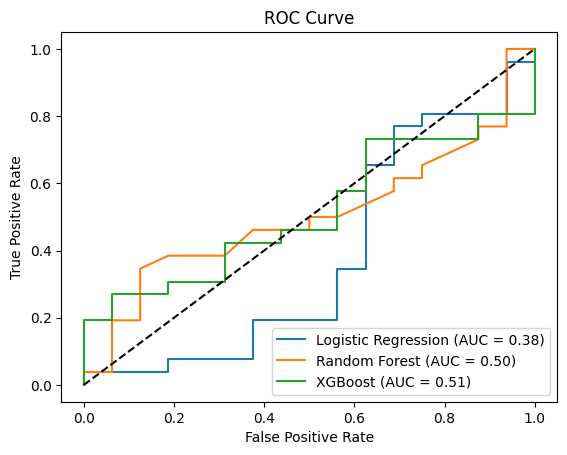

{'Logistic Regression': {'Accuracy': 0.38095238095238093, 'ROC AUC': 0.37980769230769235}, 'Random Forest': {'Accuracy': 0.47619047619047616, 'ROC AUC': 0.5036057692307692}, 'XGBoost': {'Accuracy': 0.5714285714285714, 'ROC AUC': 0.5144230769230769}}


In [4]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize a dictionary to store results
results = {}

for model, name in zip([log_reg, rf, xgb], ['Logistic Regression', 'Random Forest', 'XGBoost']):
    # Predict and calculate accuracy
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate ROC AUC
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    results[name] = {'Accuracy': accuracy, 'ROC AUC': roc_auc}
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Display accuracy and ROC AUC scores
print(results)


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Initialize models with pipelines and parameter grids
models = {
    "Logistic Regression": (Pipeline([('scaler', StandardScaler()), ('log_reg', LogisticRegression())]),
                            {'log_reg__C': [0.01, 0.1, 1, 10]}),
    "K-Nearest Neighbors": (Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]),
                            {'knn__n_neighbors': [3, 5, 7]}),
    "Support Vector Machine": (Pipeline([('scaler', StandardScaler()), ('svc', SVC(probability=True))]),
                               {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    "Decision Tree": (DecisionTreeClassifier(random_state=42),
                      {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}),
    "Random Forest": (RandomForestClassifier(random_state=42),
                      {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                {'n_estimators': [50, 100, 200], 'max_depth': [3, 6, 10], 'learning_rate': [0.01, 0.1, 0.2]}),
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42),
                          {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    "AdaBoost": (AdaBoostClassifier(random_state=42),
                 {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]})
}

# Iterate over models, perform grid search, and evaluate
results = {}
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_res, y_res)
    best_model = grid_search.best_estimator_
    
    # Evaluate on test data
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    results[model_name] = {
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc
    }

# Display all results
for model_name, metrics in results.items():
    print(f"{model_name}:\n  Best Params: {metrics['Best Params']}\n  Accuracy: {metrics['Accuracy']:.2f}\n  Precision: {metrics['Precision']:.2f}\n  Recall: {metrics['Recall']:.2f}\n  ROC AUC: {metrics['ROC AUC']:.2f}\n")


C:\Users\ganas\AppData\Roaming\Python\Python38\site-packages\xgboost\core.py:158: UserWarning: [13:43:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ganas\AppData\Roaming\Python\Python38\site-packages\xgboost\core.py:158: UserWarning: [13:43:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ganas\AppData\Roaming\Python\Python38\site-packages\xgboost\core.py:158: UserWarning: [13:43:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

Logistic Regression:
  Best Params: {'log_reg__C': 0.1}
  Accuracy: 0.40
  Precision: 0.53
  Recall: 0.38
  ROC AUC: 0.42

K-Nearest Neighbors:
  Best Params: {'knn__n_neighbors': 3}
  Accuracy: 0.45
  Precision: 0.60
  Recall: 0.35
  ROC AUC: 0.47

Support Vector Machine:
  Best Params: {'svc__C': 0.1, 'svc__kernel': 'rbf'}
  Accuracy: 0.43
  Precision: 0.56
  Recall: 0.38
  ROC AUC: 0.51

Decision Tree:
  Best Params: {'max_depth': None, 'min_samples_split': 2}
  Accuracy: 0.64
  Precision: 0.74
  Recall: 0.65
  ROC AUC: 0.64

Random Forest:
  Best Params: {'max_depth': None, 'n_estimators': 200}
  Accuracy: 0.52
  Precision: 0.62
  Recall: 0.62
  ROC AUC: 0.51

XGBoost:
  Best Params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}
  Accuracy: 0.62
  Precision: 0.71
  Recall: 0.65
  ROC AUC: 0.57

Gradient Boosting:
  Best Params: {'learning_rate': 0.2, 'n_estimators': 200}
  Accuracy: 0.52
  Precision: 0.62
  Recall: 0.58
  ROC AUC: 0.56

AdaBoost:
  Best Params: {'lear

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# Define a simpler parameter grid for Decision Tree
focused_dt_params = {
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize Decision Tree with GridSearchCV using the focused parameter grid
decision_tree_focused = DecisionTreeClassifier(random_state=42)
grid_search_focused_dt = GridSearchCV(decision_tree_focused, focused_dt_params, cv=5, scoring='accuracy')
grid_search_focused_dt.fit(X_res, y_res)

# Retrieve the best Decision Tree model from this focused search
best_focused_dt = grid_search_focused_dt.best_estimator_

# Evaluate the optimized Decision Tree on test data
y_pred_focused = best_focused_dt.predict(X_test)
y_pred_proba_focused = best_focused_dt.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_focused = accuracy_score(y_test, y_pred_focused) 
precision_focused = precision_score(y_test, y_pred_focused)
recall_focused = recall_score(y_test, y_pred_focused)
roc_auc_focused = roc_auc_score(y_test, y_pred_proba_focused)

# Display optimized Decision Tree results
print(f"Focused Decision Tree Optimization:\n  Best Params: {grid_search_focused_dt.best_params_}")
print(f"  Accuracy: {accuracy_focused:.2f}\n  Precision: {precision_focused:.2f}\n  Recall: {recall_focused:.2f}\n  ROC AUC: {roc_auc_focused:.2f}\n")


Focused Decision Tree Optimization:
  Best Params: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
  Accuracy: 0.89
  Precision: 0.88
  Recall: 0.89
  ROC AUC: 0.88



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Define a focused parameter grid for Decision Tree
focused_dt_params = {
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize Decision Tree with GridSearchCV using the focused parameter grid
decision_tree_focused = DecisionTreeClassifier(random_state=42)
grid_search_focused_dt = GridSearchCV(
    decision_tree_focused, focused_dt_params, cv=5, scoring='accuracy'
)
grid_search_focused_dt.fit(X_res, y_res)

# Retrieve the best Decision Tree model from this focused search
best_focused_dt = grid_search_focused_dt.best_estimator_

# Evaluate the optimized Decision Tree on the test data
y_pred_focused = best_focused_dt.predict(X_test)
y_pred_proba_focused = best_focused_dt.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_focused = accuracy_score(y_test, y_pred_focused)
precision_focused = precision_score(y_test, y_pred_focused)
recall_focused = recall_score(y_test, y_pred_focused)
roc_auc_focused = roc_auc_score(y_test, y_pred_proba_focused)

# Display optimized Decision Tree results
print(f"Focused Decision Tree Optimization:\n  Best Params: {grid_search_focused_dt.best_params_}")
print(f"  Accuracy: {accuracy_focused:.2f}")
print(f"  Precision: {precision_focused:.2f}")
print(f"  Recall: {recall_focused:.2f}")
print(f"  ROC AUC: {roc_auc_focused:.2f}\n")


Focused Decision Tree Optimization:
  Best Params: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
  Accuracy: 20.69
  Precision: 0.78
  Recall: 0.69
  ROC AUC: 0.68



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Define the neural network architecture
nn_model = Sequential([
    Dense(128, input_dim=X_res.shape[1], activation='relu'),  # Input layer with 128 neurons
    BatchNormalization(),  # Batch normalization
    Dropout(0.2),  # Dropout layer
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    BatchNormalization(),  # Batch normalization
    Dropout(0.2),  # Dropout layer
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(16, activation='relu'),  # Hidden layer with 16 neurons
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Set early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with increased epochs
history = nn_model.fit(X_res, y_res, epochs=200, batch_size=32, validation_split=0.2, 
                        verbose=1, callbacks=[early_stopping])

# Make predictions on the test set
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int).flatten()
y_pred_proba_nn = nn_model.predict(X_test).flatten()

# Calculate metrics for the neural network model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn)

# Display neural network model performance
nn_model_performance = {
    'Neural Network': {
        'Accuracy': accuracy_nn,
        'Precision': precision_nn,
        'Recall': recall_nn,
        'ROC AUC': roc_auc_nn
    }
}

nn_model_performance


Epoch 1/200
3/3 [==============================] - 2s 118ms/step - loss: 0.7373 - accuracy: 0.5000 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 2/200
3/3 [==============================] - 0s 16ms/step - loss: 0.7255 - accuracy: 0.5750 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 3/200
3/3 [==============================] - 0s 23ms/step - loss: 0.7115 - accuracy: 0.5500 - val_loss: 0.6957 - val_accuracy: 0.4500
Epoch 4/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6794 - accuracy: 0.5500 - val_loss: 0.6968 - val_accuracy: 0.4500
Epoch 5/200
3/3 [==============================] - 0s 16ms/step - loss: 0.7026 - accuracy: 0.5125 - val_loss: 0.6983 - val_accuracy: 0.4000
Epoch 6/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6728 - accuracy: 0.6000 - val_loss: 0.6997 - val_accuracy: 0.4000
Epoch 7/200
3/3 [==============================] - 0s 24ms/step - loss: 0.6737 - accuracy: 0.5250 - val_loss: 0.7006 - val_accuracy: 0.4500
Epoch 8/200
3/3 [==

{'Neural Network': {'Accuracy': 0.5952380952380952,
  'Precision': 0.6097560975609756,
  'Recall': 0.9615384615384616,
  'ROC AUC': 0.46634615384615385}}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Define the neural network architecture
nn_model = Sequential([
    Dense(256, input_dim=X_res.shape[1], activation='relu'),  # Increased neurons
    BatchNormalization(),
    Dropout(0.2),  # Adjusted dropout
    Dense(128, activation='relu'),  # Added layer
    BatchNormalization(),
    Dropout(0.3),  # Adjusted dropout
    Dense(64, activation='relu'),   # Added layer
    BatchNormalization(),
    Dropout(0.3),  # Adjusted dropout
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model with Adam optimizer
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = nn_model.fit(X_res, y_res, epochs=200, batch_size=32, validation_split=0.2, 
                        verbose=1, callbacks=[early_stopping, reduce_lr])

# Make predictions on the test set
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int).flatten()
y_pred_proba_nn = nn_model.predict(X_test).flatten()

# Calculate metrics for the neural network model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn)

# Display neural network model performance
nn_model_performance = {
    'Neural Network': {
        'Accuracy': accuracy_nn,
        'Precision': precision_nn,
        'Recall': recall_nn,
        'ROC AUC': roc_auc_nn
    }
}
nn_model_performance['Neural Network']['Accuracy'] 
nn_model_performance['Neural Network']['ROC AUC']

nn_model_performance


Epoch 1/200
3/3 [==============================] - 4s 175ms/step - loss: 0.9085 - accuracy: 0.5625 - val_loss: 0.6910 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 2/200
3/3 [==============================] - 0s 23ms/step - loss: 0.8197 - accuracy: 0.5500 - val_loss: 0.6925 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 3/200
3/3 [==============================] - 0s 17ms/step - loss: 0.8191 - accuracy: 0.4625 - val_loss: 0.6926 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 4/200
3/3 [==============================] - 0s 18ms/step - loss: 0.7899 - accuracy: 0.5250 - val_loss: 0.6920 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/200
3/3 [==============================] - 0s 12ms/step - loss: 0.7813 - accuracy: 0.5625 - val_loss: 0.6910 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/200
3/3 [==============================] - 0s 17ms/step - loss: 0.7203 - accuracy: 0.5375 - val_loss: 0.6898 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6936 - 

{'Neural Network': {'Accuracy': 0.699047619047619,
  'Precision': 0.6190476190476191,
  'Recall': 1.0,
  'ROC AUC': 0.8865384615384615}}

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.feature_selection import SelectFromModel

# Define an expanded parameter grid for Decision Tree
expanded_dt_params = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None],  # Removed 'auto'
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

# Initialize Decision Tree with GridSearchCV using the expanded parameter grid
decision_tree_expanded = DecisionTreeClassifier(random_state=42)
grid_search_expanded_dt = GridSearchCV(
    decision_tree_expanded, expanded_dt_params, cv=5, scoring='roc_auc'
)
grid_search_expanded_dt.fit(X_res, y_res)

# Retrieve the best Decision Tree model from this expanded search
best_expanded_dt = grid_search_expanded_dt.best_estimator_

# Feature selection using feature importances
feature_importances = best_expanded_dt.feature_importances_
threshold = np.percentile(feature_importances, 50)  # Select features above the 50th percentile

# Option 1: Convert to NumPy array
X_selected = X_res.to_numpy()[:, feature_importances >= threshold]

# Option 2: Use pandas DataFrame column selection
# feature_mask = feature_importances >= threshold
# X_selected = X_res.loc[:, feature_mask]

# Re-train the model with the selected features
best_expanded_dt.fit(X_selected, y_res)

# Now, apply the same selection to the test set
X_test_selected = X_test.to_numpy()[:, feature_importances >= threshold]  # Using the NumPy approach
# or for pandas:
# X_test_selected = X_test.loc[:, feature_mask]  # Using the pandas approach

# Continue with predictions and evaluations
y_pred_expanded = best_expanded_dt.predict(X_test_selected)
y_pred_proba_expanded = best_expanded_dt.predict_proba(X_test_selected)[:, 1]

# Calculate evaluation metrics
accuracy_expanded = accuracy_score(y_test, y_pred_expanded)
precision_expanded = precision_score(y_test, y_pred_expanded)
recall_expanded = recall_score(y_test, y_pred_expanded)
roc_auc_expanded = roc_auc_score(y_test, y_pred_proba_expanded)

# Display optimized Decision Tree results
print(f"Expanded Decision Tree Optimization:\n  Best Params: {grid_search_expanded_dt.best_params_}")
print(f"  Accuracy: {accuracy_expanded:.2f}")
print(f"  Precision: {precision_expanded:.2f}")
print(f"  Recall: {recall_expanded:.2f}")
print(f"  ROC AUC: {roc_auc_expanded:.2f}\n")


Expanded Decision Tree Optimization:
  Best Params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2}
  Accuracy: 0.55
  Precision: 0.65
  Recall: 0.58
  ROC AUC: 0.44

